In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Load dataset

In [3]:
path = 'D:\Computer Science & Technology\Deep Learning\Digit Recognition/mnist.npz'
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data(path)

In [4]:
len(X_train)

60000

In [5]:
len(y_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

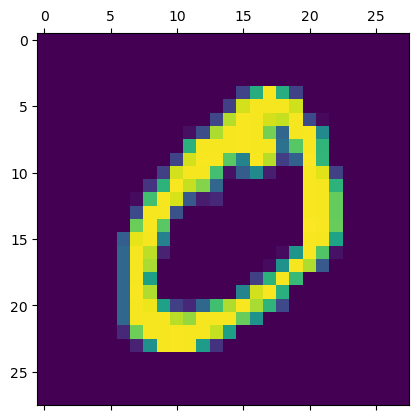

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[1]

0

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# Scale the dataset

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flatand = X_train.reshape(len(X_train), 28*28)
X_test_flatand = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train_flatand[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Simple neural network

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatand, y_train, epochs = 5 )

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4732 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9257


# Predict 

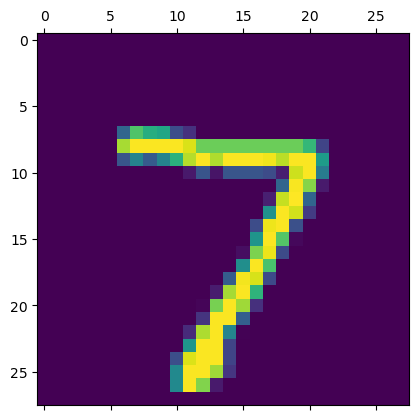

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted = model.predict(X_test_flatand)

313/313 [==============================] - 1s 2ms/step


In [19]:
np.argmax(y_predicted[0])

7

In [20]:
model.evaluate(X_test_flatand, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.9248


[0.2691325545310974, 0.9247999787330627]

# Confusion Matrix

In [21]:
y_predicted_lebels = [np.argmax(i) for i in y_predicted]
y_predicted_lebels[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_lebels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    3,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    9,  910,   23,   11,    4,   13,   13,   39,    3],
       [   1,    0,   14,  935,    1,   16,    3,   12,   21,    7],
       [   2,    1,    2,    1,  928,    0,   11,    4,    9,   24],
       [   9,    3,    2,   41,   11,  758,   18,    9,   35,    6],
       [  10,    3,    4,    1,    8,    8,  921,    2,    1,    0],
       [   1,    5,   21,    7,    7,    0,    0,  959,    4,   24],
       [   5,    7,    6,   25,    9,   19,    9,   14,  874,    6],
       [  10,    7,    1,   12,   37,    6,    0,   36,    5,  895]])>

Text(95.72222222222221, 0.5, 'Truth')

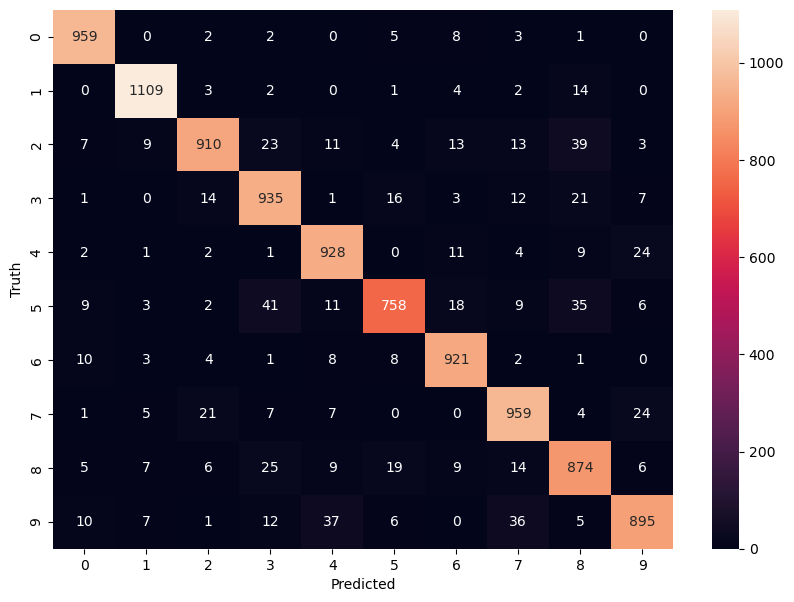

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Neural Network Using Hidden Layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'sigmoid'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatand, y_train, epochs = 5 )

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4190 - accuracy: 0.8939
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2048 - accuracy: 0.9421
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1528 - accuracy: 0.9562
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1208 - accuracy: 0.9650
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0990 - accuracy: 0.9715


In [26]:
model.evaluate(X_test_flatand, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9675


[0.10331007093191147, 0.9674999713897705]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

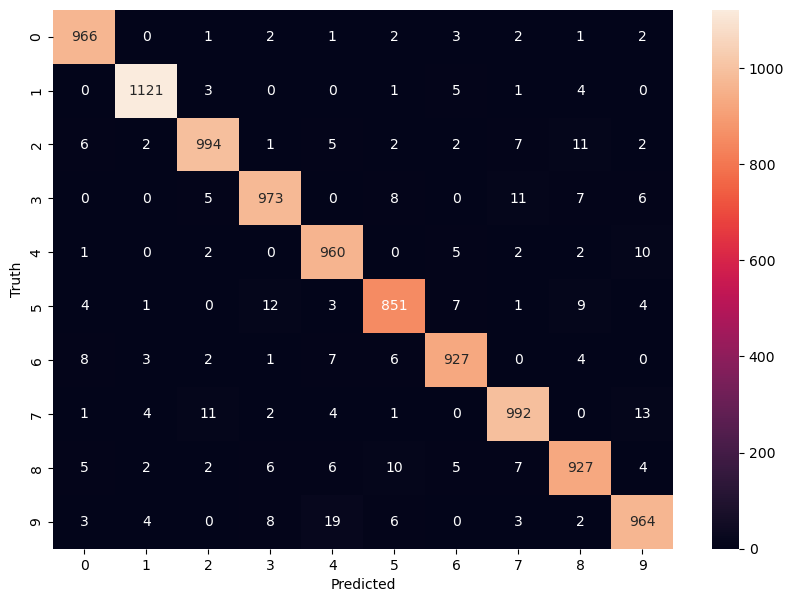

In [27]:
y_predicted = model.predict(X_test_flatand)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using flattend layer

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'sigmoid'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4162 - accuracy: 0.8938
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2024 - accuracy: 0.9419
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1513 - accuracy: 0.9562
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1191 - accuracy: 0.9662
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0979 - accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0814 - accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0692 - accuracy: 0.9801
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0588 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9861
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.04

# Using CNN 

In [45]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

In [46]:
cnn.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
cnn.fit(X_train, y_train, epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 46s 23ms/step - loss: 0.1510 - accuracy: 0.9548
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0546 - accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0173 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 42s 22m

313/313 [==============================] - 3s 8ms/step


Text(95.72222222222221, 0.5, 'Truth')

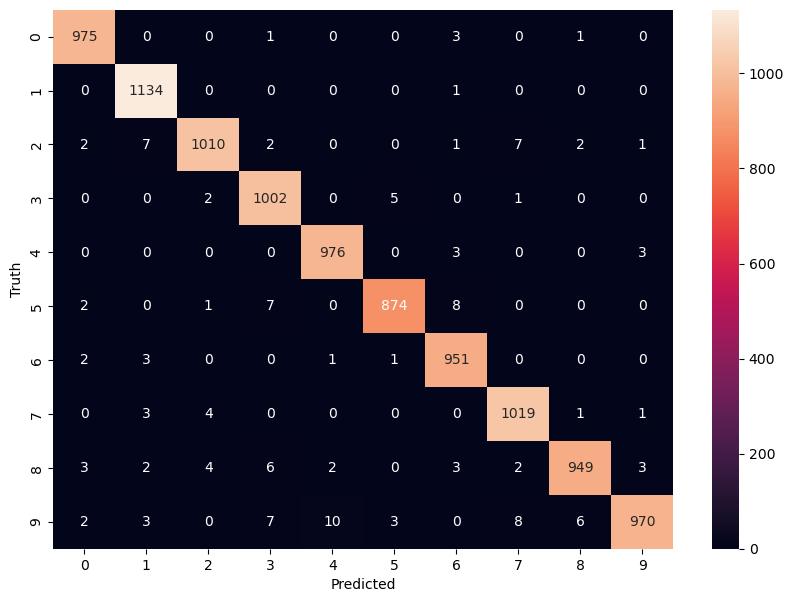

In [49]:
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')